## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Тема: Основы анализа данных и машинного обучения в Python.

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   4 апреля 2021

**Дедлайн**:   21:00 18 апреля 2021

**Среда выполнения**: Jupyter Notebook (Python 3.7)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [8]:
import numpy as np

def task_1(arr):
    return np.all((np.array(arr) > 0)) == True

print(task_1([1, 3, 5]))
print(task_1([1, 3, 5, -4]))

True
False


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [12]:
def task_2(arr, n):
    return np.repeat(np.array(arr), repeats = n, axis = 0)

task_2([4, 6, 7, 3], 3)

array([4, 4, 4, 6, 6, 6, 7, 7, 7, 3, 3, 3])

__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [121]:
def task_3(V, v):
    V = np.cumsum(V)
    v = np.cumsum(v) - 1
    A = np.append(np.zeros((1,), dtype = int), V[v])
    return np.diff(A)

print(task_3([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 1, 3]), '\n')
print(task_3([2, 4, 6, 13], [1]), '\n')
print(task_3([3, 5, 3, 6, 1, 7], [2, 1]))

[ 3  3 15] 

[2] 

[8 3]


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_name', 'label_id'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1.5 балла):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

                                                text  is_train  label_id
0  From: lerxst@wam.umd.edu (where's my thing)\nS...      True         7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...      True         4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...      True         4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...      True         1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      True        14 

   label_name                  label_id
0           0               alt.atheism
1           1             comp.graphics
2           2   comp.os.ms-windows.misc
3           3  comp.sys.ibm.pc.hardware
4           4     comp.sys.mac.hardware 

                                                    text  is_train  label_name
0      From: lerxst@wam.umd.edu (where's my thing)\nS...      True         0.0
1      From: guykuo@carson.u.washington.edu (Guy Kuo)...      True         1.0
2      From: twillis@ec.ecn.purdue.edu (Thomas E Will...      True         2.0
3 

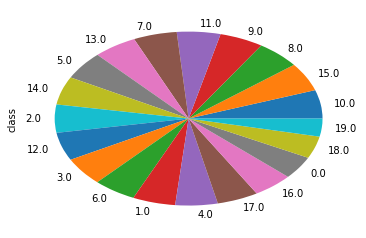

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Решение пункта 1
def task_4(table1, table2, colname):
    res = pd.concat([table1, table2], axis=1)
    del res[colname]
    return res

print(data.head(), '\n')
print(label_names.head(), '\n')
print(task_4(data, label_names, 'label_id'), '\n')


# Решение пункта 2
print('Количество обучающих данных ', len(data[data['is_train'] == True]) , '\n')
print('Проверка: ', len(X_train.data), '\n')
print('Количество тестовых данных ', len(data[data['is_train'] == False]) , '\n')
print('Проверка: ', len(X_test.data), '\n')


# Решение пункта 3
data['class'] = data[data['is_train'] == True]['label_id']
data['class'].value_counts().plot.pie()

__Задание 5 (1.5 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [17]:
def preprocess(text):    
    t1 = text.lower()
    t1 = t1.replace('\n', ' ')
    t1 = t1.replace('\r', ' ')
    t1 = t1.replace('\t', ' ')
    for e in t1:
        if ord(e) < 97 or ord(e) > 122:
            t1 = t1.replace(e, ' ')
    t1 = t1.split(' ')
    t2 = []
    for e in t1:
        if e != '': 
            t2 += [e]
    return t2


def task_5():
    data['pp_text'] = data['text'].values
    data['pp_text'] = data['pp_text'].apply(lambda x: preprocess(x))


text1 = 'SdsdSdDd\njkkjlk\tkljj'
print(text1)
print(preprocess(text1), '\n')

text2 = 'fпfddd\rvvv@hh'
print(text2)
print(preprocess(text2), '\n')

text3 = 'frvv@@gf@@@d'
print(text3)
print(preprocess(text3), '\n')





task_5()
data



SdsdSdDd
jkkjlk	kljj
['sdsdsddd', 'jkkjlk', 'kljj']
['sdsdsddd', 'jkkjlk', 'kljj'] 

vvv@hh
['f', 'fddd', 'vvv', 'hh']
['f', 'fddd', 'vvv', 'hh'] 

frvv@@gf@@@d
['frvv', '', 'gf', '', '', 'd']
['frvv', 'gf', 'd'] 



,text,is_train,label_id,class,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,7,7.0,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,4,4.0,"[from, guykuo, carson, u, washington, edu, guy..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,4,4.0,"[from, twillis, ec, ecn, purdue, edu, thomas, ..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,1,1.0,"[from, jgreen, amber, joe, green, subject, re,..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,14,14.0,"[from, jcm, head, cfa, harvard, edu, jonathan,..."
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,True,16,16.0,"[from, dfo, vttoulu, tko, vtt, fi, foxvog, dou..."
6,From: bmdelane@quads.uchicago.edu (brian manni...,True,13,13.0,"[from, bmdelane, quads, uchicago, edu, brian, ..."
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,True,3,3.0,"[from, bgrubb, dante, nmsu, edu, grubb, subjec..."
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,True,2,2.0,"[from, holmes, iscsvax, uni, edu, subject, win..."
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,True,4,4.0,"[from, kerr, ux, cso, uiuc, edu, stan, kerr, s..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости.

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и постройте гистограмму частот.

In [33]:
from collections import Counter

train_text = sum(data[data['is_train'] == True]['pp_text'], [])
vocabulary = Counter(train_text)
# print(vocabulary)
# plt.figure(figsize=(30, 20))
# plt.bar(voc.keys(), voc.values())
f = filter(lambda x: x[1] <= 9000 and x[1] >= 3 and len(x[0]) >= 3 and len(x[0]) <= 20 and (x[0] == len(len(x[0])*x[0][0])) == False, vocabulary.items())
d = dict(list(f))
vocabulary_new = Counter(d)
# print(vocabulary_new)
# plt.figure(figsize=(30, 20))
# plt.bar(vocabulary.keys(), vocabulary.values())

def task_6():
    print('Количество уникальных слов в обучающих текстах: ', sum(vocabulary.values()))
    print('Количество уникальных слов в новом словаре: ', sum(vocabulary_new.values()))
    new_text = filter(lambda x: x in vocabulary_new.keys(), train_text)
    return list(new_text)

new_text = task_6()
print(new_text[:100])


def preprocess1(lst):
    x1 = list(filter(lambda x: x in vocabulary_new.keys(), lst))
    return ' '.join(x1)

data['new_text'] = data['pp_text'].values
data['new_text'] = data['pp_text'].apply(lambda x: preprocess1(x))
data

Количество уникальных слов в обучающих текстах:  3554834
Количество уникальных слов в новом словаре:  1928087
['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'university', 'maryland', 'college', 'park', 'wondering', 'anyone', 'out', 'could', 'enlighten', 'car', 'saw', 'other', 'day', 'door', 'sports', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'doors', 'were', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'model', 'name', 'engine', 'specs', 'years', 'production', 'where', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'brought', 'your', 'neighborhood', 'lerxst', 'guykuo', 'carson', 'washington', 'guy', 'kuo', 'clock', 'poll', 'final', 'call', 'summary', 'final', 'call', 'clock', 'reports', 'keywords', 'acceleration', 'clock', 'upgrade', 'article', 'shelley', 'university', 'washington', 'nntp', 'posting', 'host', 'carson',

,text,is_train,label_id,class,pp_text,new_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,7,7.0,"[from, lerxst, wam, umd, edu, where, s, my, th...",lerxst wam umd where thing car nntp posting ho...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,4,4.0,"[from, guykuo, carson, u, washington, edu, guy...",guykuo carson washington guy kuo clock poll fi...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,4,4.0,"[from, twillis, ec, ecn, purdue, edu, thomas, ...",ecn purdue thomas willis questions purdue univ...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,1,1.0,"[from, jgreen, amber, joe, green, subject, re,...",jgreen amber joe green weitek harris computer ...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,14,14.0,"[from, jcm, head, cfa, harvard, edu, jonathan,...",jcm head cfa harvard jonathan mcdowell shuttle...
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,True,16,16.0,"[from, dfo, vttoulu, tko, vtt, fi, foxvog, dou...",dfo vttoulu tko vtt foxvog douglas rewording s...
6,From: bmdelane@quads.uchicago.edu (brian manni...,True,13,13.0,"[from, bmdelane, quads, uchicago, edu, brian, ...",bmdelane quads uchicago brian manning delaney ...
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,True,3,3.0,"[from, bgrubb, dante, nmsu, edu, grubb, subjec...",bgrubb dante nmsu grubb ide scsi new mexico st...
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,True,2,2.0,"[from, holmes, iscsvax, uni, edu, subject, win...",holmes iscsvax uni win icon help please univer...
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,True,4,4.0,"[from, kerr, ux, cso, uiuc, edu, stan, kerr, s...",kerr cso uiuc stan kerr sigma designs double a...


__Задание 7 (2 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = vocabulary_new.keys())
corpus_train = data['new_text'][:len(data[data['is_train'] == True])].values
corpus_test = data['new_text'][:len(data[data['is_train'] == False])].values
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.fit_transform(corpus_test)

print(X_train, '\n')
print(X_test, '\n')
   

  (0, 0)	2
  (0, 1)	2
  (0, 2)	2
  (0, 3)	2
  (0, 4)	1
  (0, 5)	5
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	2
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  :	:
  (11313, 1570)	1
  (11313, 1576)	1
  (11313, 1691)	1
  (11313, 1702)	1
  (11313, 1703)	2
  (11313, 1708)	2
  (11313, 2110)	2
  (11313, 2136)	1
  (11313, 2591)	1
  (11313, 2745)	1
  (11313, 3590)	1
  (11313, 3862)	1
  (11313, 4599)	1
  (11313, 5236)	3
  (11313, 6025)	1
  (11313, 8667)	1
  (11313, 9164)	1
  (11313, 13041)	1
  (11313, 13834)	1
  (11313, 14852)	1
  (11313, 15281)	1
  (11313, 15415)	1
  (11313, 17050)	1
  (11313, 20863)	2
  (11313, 22702)	1 

  (0, 0)	2
  (0, 1)	2
  (0, 2)	2
  (0, 3)	2
  (0, 4)	1
  (0, 5)	5
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	2
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  

__Задание 8 (2 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

def task_8():
    # vectorizer = ...
    pass

    assert len(vectorizer) == len(vocabulary)

ValueError: bad input shape (11314, 39161)

__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

In [ ]:
from sklearn.metrics import plot_confusion_matrix

def task_9():
    pass

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [ ]:
from xgboost import XGBClassifier

def task_10():
    pass

__Задание 11 (2.5 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [ ]:
def task_11():
    pass

__Задание 12 (2.5 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать? Попробуйте варьировать значение T и удалять сообщества из 1 слова.

In [ ]:
from networkx import Graph
from networkx.algorithms import community

def task_12():
    # community.greedy_modularity_communities(...)
    pass